<a href="https://colab.research.google.com/github/sreita/AlgorithmsUN2024I/blob/main/Lab8/sreitaMonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Knapsack Counting**

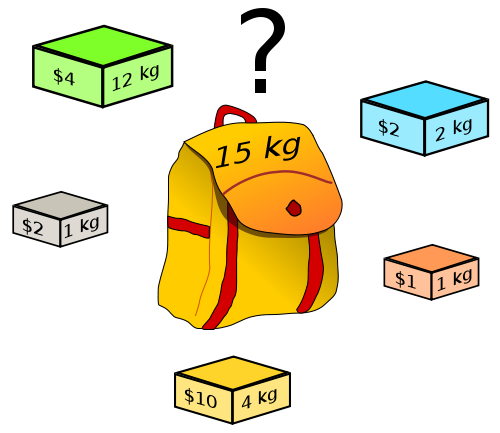

Count and calculate the exact proportion of  “Knapsack solutions.” for the problem in the image:

In [17]:
import numpy as np
from itertools import product

def find_knapsack_solutions(weights, values, capacity):
    n = len(weights)
    solutions = []
    total_combinations = 2 ** n

    # Generar todas las combinaciones posibles de 0 y 1 (entra(1) o no entra(0)) para n objetos
    for x in product([0, 1], repeat=n):
        x = np.array(x)
        total_weight = np.sum(weights * x)
        total_value = np.sum(values * x)

        # Verificar si la combinación cumple con la capacidad de la mochila
        if total_weight <= capacity:
            solutions.append((x, total_weight, total_value))

    return solutions, len(solutions), total_combinations

def format_solution(solution, weights, values):
    formatted_solution = []
    for index, included in enumerate(solution):
        if included:
            formatted_solution.append(f"{index + 1}[{weights[index]}, {values[index]}]")
    return formatted_solution

In [21]:
weights = np.array([12, 1, 4, 2, 1])
values = np.array([4, 2, 10, 2, 1])
capacity = 15


solutions, num_solutions, total_combinations = find_knapsack_solutions(weights, values, capacity)

for i, (solution, weight, value) in enumerate(solutions):
    objects_in_knapsack = [index + 1 for index in range(len(solution)) if solution[index] == 1]
    objects_in_knapsack = format_solution(solution, weights, values)
    print(f"Solution {i + 1}:")
    print(f"  Objects in knapsack: {objects_in_knapsack}")
    print(f"  Total weight: {weight}")
    print(f"  Total value: {value}")
    print()

Solution 1:
  Objects in knapsack: []
  Total weight: 0
  Total value: 0

Solution 2:
  Objects in knapsack: ['5[1, 1]']
  Total weight: 1
  Total value: 1

Solution 3:
  Objects in knapsack: ['4[2, 2]']
  Total weight: 2
  Total value: 2

Solution 4:
  Objects in knapsack: ['4[2, 2]', '5[1, 1]']
  Total weight: 3
  Total value: 3

Solution 5:
  Objects in knapsack: ['3[4, 10]']
  Total weight: 4
  Total value: 10

Solution 6:
  Objects in knapsack: ['3[4, 10]', '5[1, 1]']
  Total weight: 5
  Total value: 11

Solution 7:
  Objects in knapsack: ['3[4, 10]', '4[2, 2]']
  Total weight: 6
  Total value: 12

Solution 8:
  Objects in knapsack: ['3[4, 10]', '4[2, 2]', '5[1, 1]']
  Total weight: 7
  Total value: 13

Solution 9:
  Objects in knapsack: ['2[1, 2]']
  Total weight: 1
  Total value: 2

Solution 10:
  Objects in knapsack: ['2[1, 2]', '5[1, 1]']
  Total weight: 2
  Total value: 3

Solution 11:
  Objects in knapsack: ['2[1, 2]', '4[2, 2]']
  Total weight: 3
  Total value: 4

Solution 

In [22]:
# Número total de soluciones válidas
proportion = num_solutions / total_combinations
print(f"Number of valid knapsack solutions: {num_solutions}")
print(f"Proportion of valid knapsack solutions: {proportion:.4f}, [{proportion*100}%]")
print(f"Number of total combinations: {total_combinations}")

Number of valid knapsack solutions: 23
Proportion of valid knapsack solutions: 0.7188, [71.875%]
Number of total combinations: 32


Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,5,6,7,9,10) and the capacity of the knapsack is 10 using Mote Carlo with 1.000, 10.000 random binary vectors.

In [23]:
def count_knapsack_solutions_monte_carlo(weights, capacity, num_vectors):
    n = len(weights)
    solutions_count = 0

    for _ in range(num_vectors):
        x = np.random.randint(2, size=n)  # generar vector binario aleatorio
        total_weight = np.sum(weights * x)  # calcular peso total

        if total_weight <= capacity:
            solutions_count += 1

    proportion = solutions_count / num_vectors
    num_solutions = solutions_count

    return proportion, num_solutions

In [30]:
weights = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10])
capacity = 10
num_vectors_list = [1000, 10000]

for num_vectors in num_vectors_list:
    proportion, num_solutions = count_knapsack_solutions_monte_carlo(weights, capacity, num_vectors)
    print(f"Monte Carlo with {num_vectors} random vectors:")
    print(f"  Proportion of Knapsack solutions: {proportion:.4f}, [{proportion*100:.2f}%]")
    print(f"  Number of Knapsack solutions: {num_solutions}\n")

Monte Carlo with 1000 random vectors:
  Proportion of Knapsack solutions:0.0790, [7.90%]
  Number of Knapsack solutions: 79

Monte Carlo with 10000 random vectors:
  Proportion of Knapsack solutions:0.0746, [7.46%]
  Number of Knapsack solutions: 746



Estimate the proportion and number of “Knapsack solutions.” if the sizes are (1,2,3,4,…, 49,50) and the capacity of the knapsack are 10, 50, 100, 1275 using Mote Carlo with 10.000, 100.000 and 1.000.000 random binary vectors.

=======================================================

In these cases there are 0 solutions because the Knapsack overflows since the objects are very heavy. For example, for 10, 50 and 100, the randomly chosen objects cannot satisfy the condition because it is very unlikely to take the smallest elements or because it is very likely that the elements taken overflow the Knapsack, such as taking the object of weight 50 in the Snacpack of capacity 10 or 50, which in the case of 10 there is an 80% probability of overflowing the Knapsack with the first chosen item (40/50) for example.
In the case of 1275, the capacity is so much that in all cases it is possible to take all the elements and put them in the suitcase since in the case where they are all chosen, their sum is 1275 (sum of weights from 1 to 50).  

In [35]:
weights = list(range(1, 51))
capacities = [10, 50, 100, 1275]

num_vectors_list = [10000, 100000, 1000000]

for capacity in capacities:
    print(f"Capacity of knapsack: {capacity}")
    print("=================================")

    for num_vectors in num_vectors_list:
        proportion, num_solutions = count_knapsack_solutions_monte_carlo(weigths, capacity, num_vectors)
        print(f"Monte Carlo with {num_vectors} random vectors:")
        print(f"  Proportion of Knapsack solutions: {proportion:.4f}, [{proportion*100:.2f}%]")
        print(f"  Number of Knapsack solutions: {num_solutions}\n")


Capacity of knapsack: 10
Monte Carlo with 10000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Monte Carlo with 100000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Monte Carlo with 1000000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Capacity of knapsack: 50
Monte Carlo with 10000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Monte Carlo with 100000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Monte Carlo with 1000000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Capacity of knapsack: 100
Monte Carlo with 10000 random vectors:
  Proportion of Knapsack solutions: 0.0000, [0.00%]
  Number of Knapsack solutions: 0

Monte Carlo with 100000 random vecto